### Data Preparation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the train.csv
train = pd.read_csv("training_set_VU_DM.csv", low_memory=False)

# Check the data' shape and first few rows
print("Shape of training set:", train.shape)
train.head()

Shape of training set: (4958347, 54)


,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [3]:
# Print all the columns for further feature study
print("Columns in the dataset:")
print(train.columns.tolist())

Columns in the dataset:
['srch_id', 'date_time', 'site_id', 'visitor_location_country_id', 'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id', 'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool', 'prop_location_score1', 'prop_location_score2', 'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag', 'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window', 'srch_adults_count', 'srch_children_count', 'srch_room_count', 'srch_saturday_night_bool', 'srch_query_affinity_score', 'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv', 'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv', 'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv', 'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv', 'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv', 'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv', 'comp6_rate_percent_diff', 'comp7_rate', 'comp7_inv', 'comp7_rate_percent_diff', 'comp8_rate', 'comp8_inv', 'comp8_rate

In [4]:
# Count missing values and calculate percentage of missing values for each column
missing_values = train.isnull().sum()
missing_percent = (missing_values / len(train)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percent
})

# Filter only columns with missing values, sorted by percentage descending
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values(by='Missing Percentage', ascending=False)

missing_df

,Missing Count,Missing Percentage
comp1_rate_percent_diff,4863908,98.095353
comp6_rate_percent_diff,4862173,98.060362
comp1_rate,4838417,97.581250
comp1_inv,4828788,97.387053
comp4_rate_percent_diff,4827261,97.356256
gross_bookings_usd,4819957,97.208949
comp7_rate_percent_diff,4819832,97.206428
comp6_rate,4718190,95.156511
visitor_hist_starrating,4706481,94.920364
visitor_hist_adr_usd,4705359,94.897735


In [5]:
# Identify columns with more than 95% missing values
missing_info = train.isnull().mean()
high_missing_cols = missing_info[missing_info > 0.95].index.tolist()

# Keep columns we plan to use in feature engineering
to_keep = ['visitor_hist_starrating', 'visitor_hist_adr_usd', 'comp6_rate']
drop_cols = [col for col in high_missing_cols if col not in to_keep]

# Drop only the truly unwanted high-missing columns
train = train.drop(columns=drop_cols)
print("Shape after dropping high-missing columns:", train.shape)

# Fill important columns we kept with 0 (representing 'unknown')
fill_0_cols = [col for col in to_keep if col in train.columns]
train[fill_0_cols] = train[fill_0_cols].fillna(0)

# Fill comp-related fields (with 50–95% missing) with 0
comp_cols = [col for col in train.columns if 'comp' in col and col not in drop_cols]
train[comp_cols] = train[comp_cols].fillna(0)

# Fill remaining lower-missing numerical features with median
train['orig_destination_distance'] = train['orig_destination_distance'].fillna(train['orig_destination_distance'].median())
train['prop_location_score2'] = train['prop_location_score2'].fillna(train['prop_location_score2'].median())
train['prop_review_score'] = train['prop_review_score'].fillna(train['prop_review_score'].median())

✅ Shape after dropping high-missing columns: (4958347, 47)


In [6]:
# Check data types
train.dtypes

srch_id                          int64
date_time                       object
site_id                          int64
visitor_location_country_id      int64
visitor_hist_starrating        float64
visitor_hist_adr_usd           float64
prop_country_id                  int64
prop_id                          int64
prop_starrating                  int64
prop_review_score              float64
prop_brand_bool                  int64
prop_location_score1           float64
prop_location_score2           float64
prop_log_historical_price      float64
position                         int64
price_usd                      float64
promotion_flag                   int64
srch_destination_id              int64
srch_length_of_stay              int64
srch_booking_window              int64
srch_adults_count                int64
srch_children_count              int64
srch_room_count                  int64
srch_saturday_night_bool         int64
srch_query_affinity_score      float64
orig_destination_distance

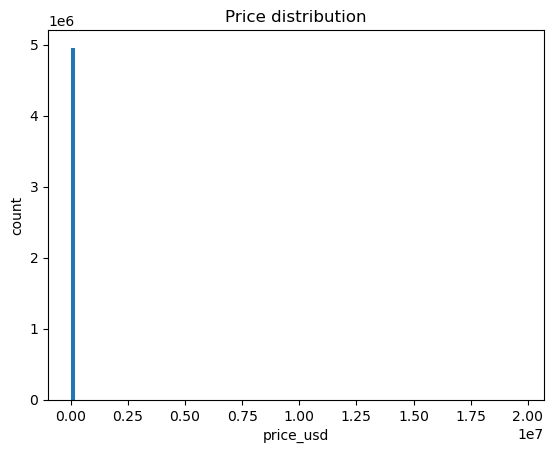

In [7]:
# Check price_usd distribution
plt.hist(train['price_usd'], bins=100)
plt.title("Price distribution")
plt.xlabel("price_usd")
plt.ylabel("count")
plt.show()

In [8]:
# Check booking rate
booking_rate = train['booking_bool'].mean()
click_rate = train['click_bool'].mean()

print(f"Booking rate: {booking_rate:.4f}")
print(f"Click rate: {click_rate:.4f}")

Booking rate: 0.0279
Click rate: 0.0447


In [9]:
# Check how many hotels for each search_id?
srch_counts = train.groupby('srch_id')['prop_id'].count()
print(srch_counts.describe())

count    199795.000000
mean         24.817173
std           9.113335
min           5.000000
25%          18.000000
50%          29.000000
75%          32.000000
max          38.000000
Name: prop_id, dtype: float64


In [10]:
# Convert to datetime format
train['date_time'] = pd.to_datetime(train['date_time'], errors='coerce')

# Extract year, month, day, weekday, hour
train['search_year'] = train['date_time'].dt.year
train['search_month'] = train['date_time'].dt.month
train['search_day'] = train['date_time'].dt.day
train['search_weekday'] = train['date_time'].dt.weekday  # 0 = Monday
train['search_hour'] = train['date_time'].dt.hour

# Create weekend indicator (1 if Saturday or Sunday)
train['search_is_weekend'] = train['search_weekday'].isin([5, 6]).astype(int)

In [11]:
# Clip price values at an upper bound to reduce outlier effect
train['price_usd'] = train['price_usd'].clip(upper=5000)

# Add a log-transformed version of price
train['price_usd_log'] = np.log1p(train['price_usd'])

### Feature engineering

In [12]:
# 1. Combined target: click + booking
train['click_or_book'] = train['click_bool'] + 5 * train['booking_bool']

# 2. Discount-related features
train['price_discount'] = train['prop_log_historical_price'] - np.log1p(train['price_usd'])
train['has_discount'] = (train['price_discount'] > 0).astype(int)

# 3. Normalized price
stay_nights = train['srch_length_of_stay'].replace(0, np.nan)
group_size = (train['srch_adults_count'] + train['srch_children_count']).replace(0, np.nan)
train['price_per_night_per_person'] = train['price_usd'] / (stay_nights * group_size)

# 4. Promotion flag
train['is_promotion'] = train['promotion_flag'].fillna(0).astype(int)

# 5. Saturday night flag & star interaction
train['includes_saturday'] = train['srch_saturday_night_bool'].fillna(0).astype(int)
train['sat_night_star_combo'] = train['srch_saturday_night_bool'] * train['prop_starrating']

# 6. Interaction features
train['star_price_interaction'] = train['prop_starrating'] * train['prop_log_historical_price']
train['starrating_diff'] = train['prop_starrating'] - train['visitor_hist_starrating']
train['price_diff_vs_history'] = train['price_usd'] - train['visitor_hist_adr_usd']

# 7. Location and review features
train['location_score_sum'] = train['prop_location_score1'] + train['prop_location_score2']
train['log_distance'] = np.log1p(train['orig_destination_distance'])
train['prop_review_score_squared'] = train['prop_review_score'] ** 2

# 8. Hotel popularity
hotel_freq = train['prop_id'].value_counts().to_dict()
train['hotel_freq'] = train['prop_id'].map(hotel_freq)

# 9. User affinity
train['srch_query_affinity_score'] = train['srch_query_affinity_score'].fillna(train['srch_query_affinity_score'].median())
train['affinity_rank'] = train.groupby('srch_id')['srch_query_affinity_score'].rank(ascending=False)

# 10. Competitor price comparison (only if available)
if 'comp6_rate' in train.columns:
    train['is_cheaper_than_comp6'] = (train['price_usd'] < train['comp6_rate']).astype(int)

comp_rate_cols = [col for col in train.columns if 'comp' in col and 'rate_percent_diff' in col]
if comp_rate_cols:
    train['avg_comp_discount'] = train[comp_rate_cols].replace(np.nan, 0).mean(axis=1)

# 11. Ranking features
train['price_rank'] = train.groupby('srch_id')['price_usd'].rank(method='min', ascending=True)
train['star_rank'] = train.groupby('srch_id')['prop_starrating'].rank(method='min', ascending=True)
train['review_rank'] = train.groupby('srch_id')['prop_review_score'].rank(method='min', ascending=True)

train['is_first_position'] = (train['position'] == 1).astype(int)
train['is_cheapest'] = (train['price_rank'] == 1).astype(int)
train['is_best_rating'] = (train.groupby('srch_id')['prop_review_score'].transform('max') == train['prop_review_score']).astype(int)

In [13]:
print(train.columns.tolist())

['srch_id', 'date_time', 'site_id', 'visitor_location_country_id', 'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id', 'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool', 'prop_location_score1', 'prop_location_score2', 'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag', 'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window', 'srch_adults_count', 'srch_children_count', 'srch_room_count', 'srch_saturday_night_bool', 'srch_query_affinity_score', 'orig_destination_distance', 'random_bool', 'comp2_rate', 'comp2_inv', 'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv', 'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv', 'comp5_rate', 'comp5_inv', 'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv', 'comp7_rate', 'comp7_inv', 'comp8_rate', 'comp8_inv', 'comp8_rate_percent_diff', 'click_bool', 'booking_bool', 'search_year', 'search_month', 'search_day', 'search_weekday', 'search_hour', 'search_is_weekend', 'price_usd_log

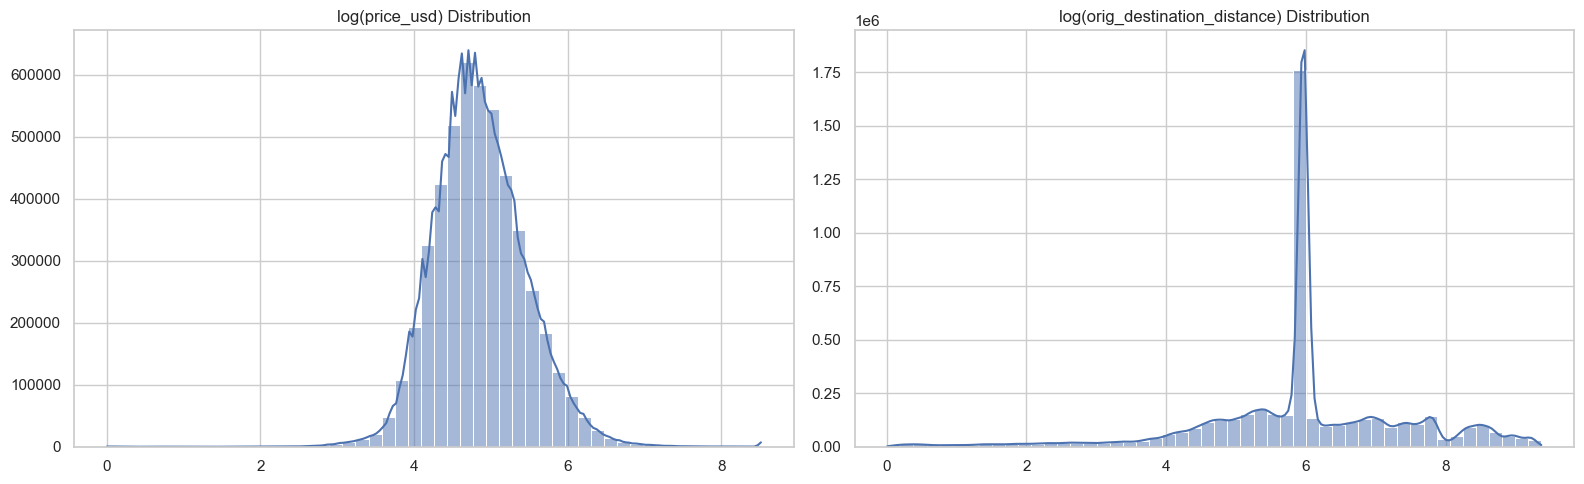

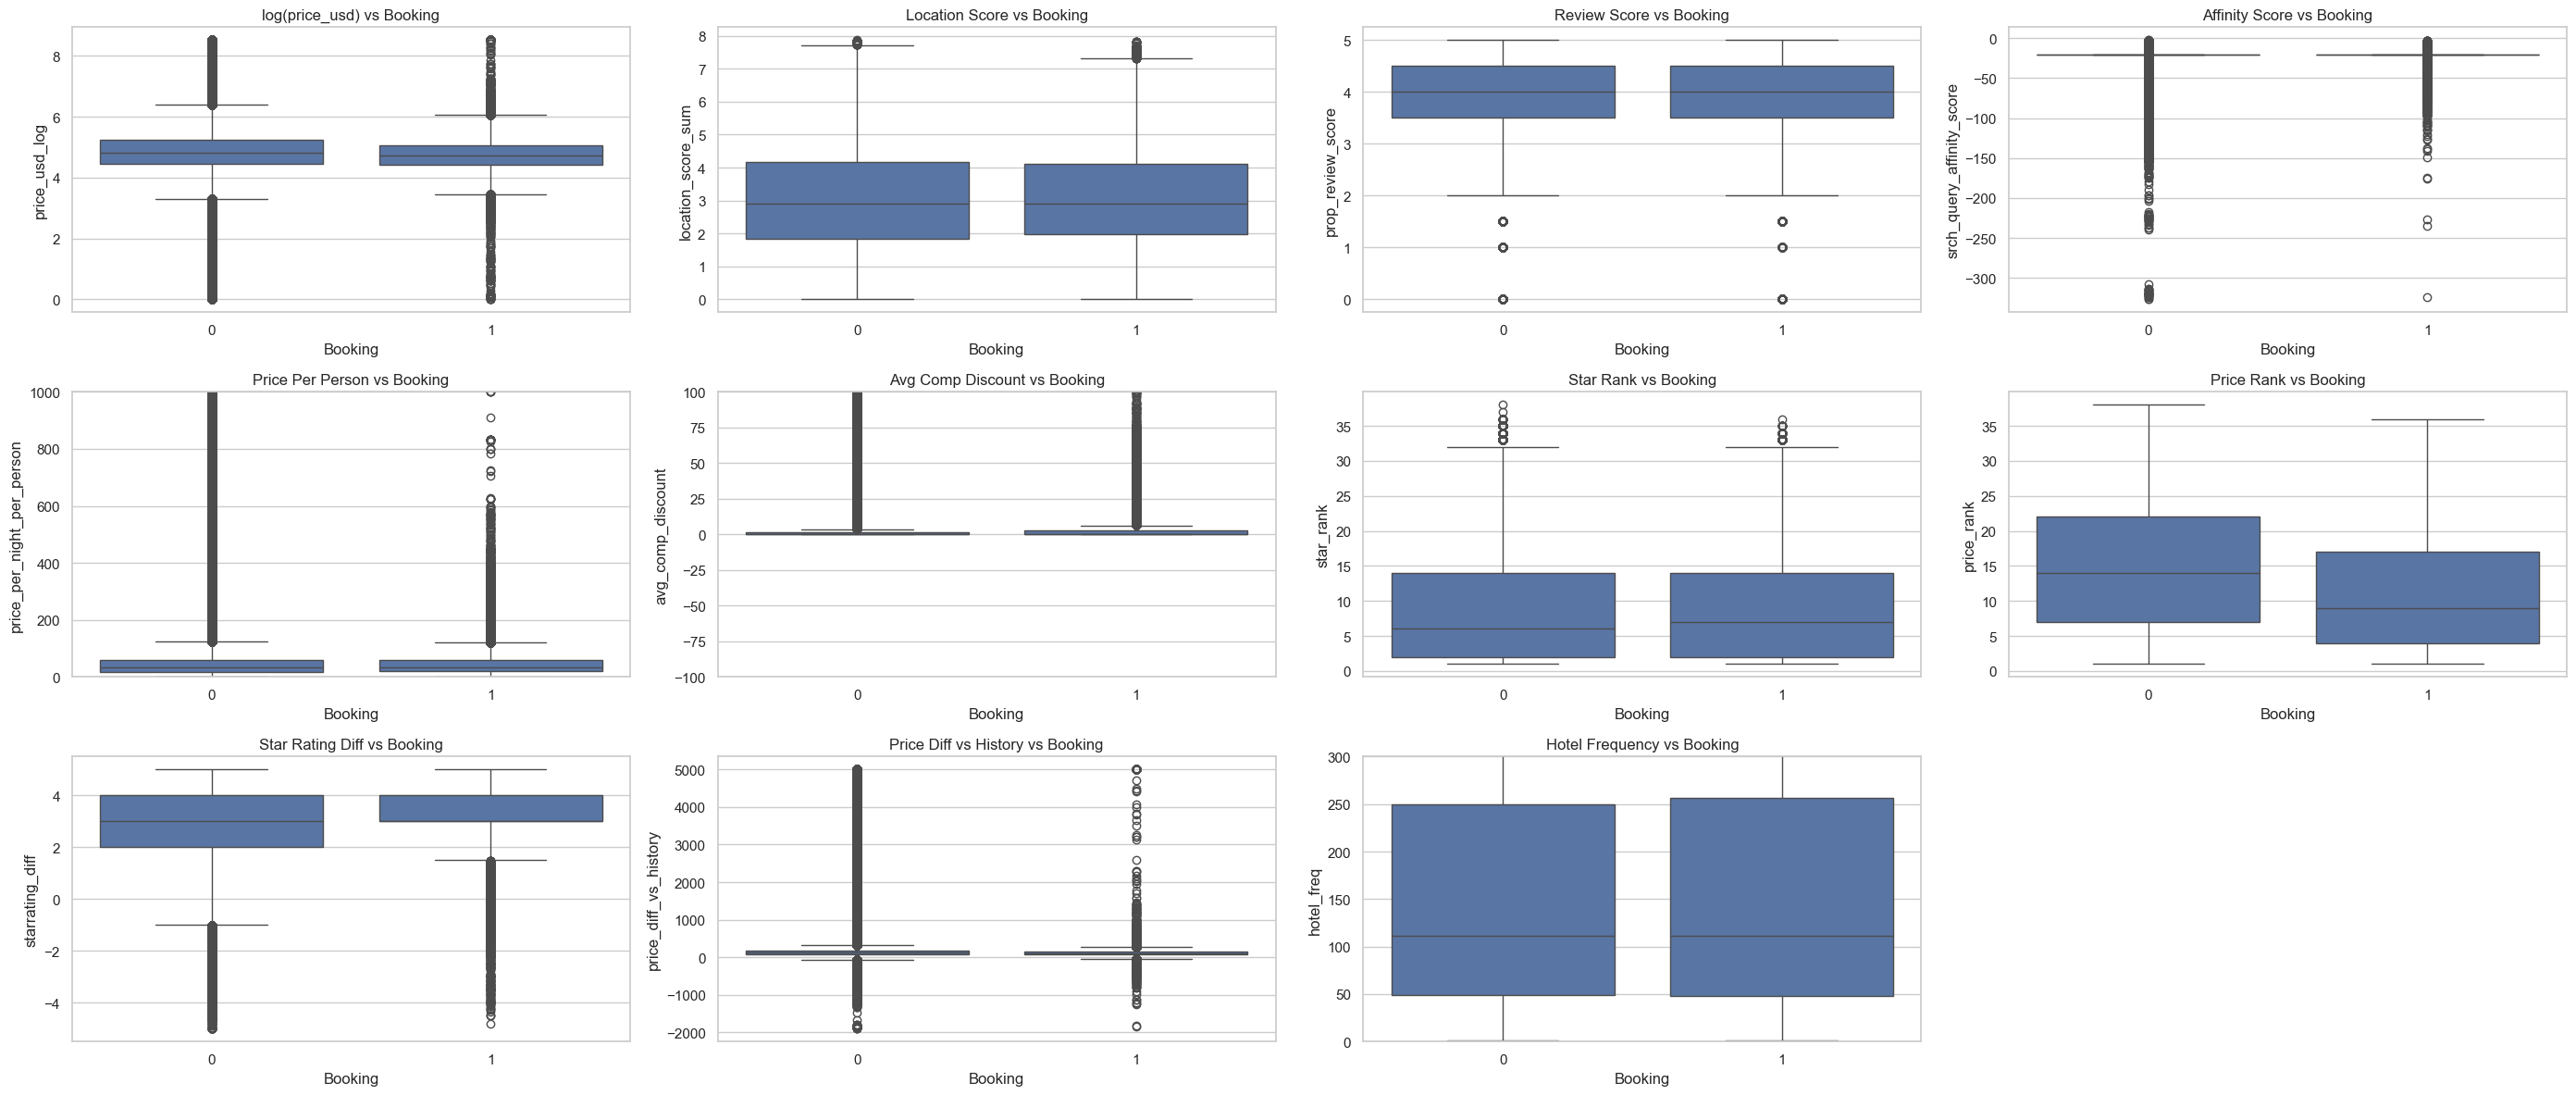

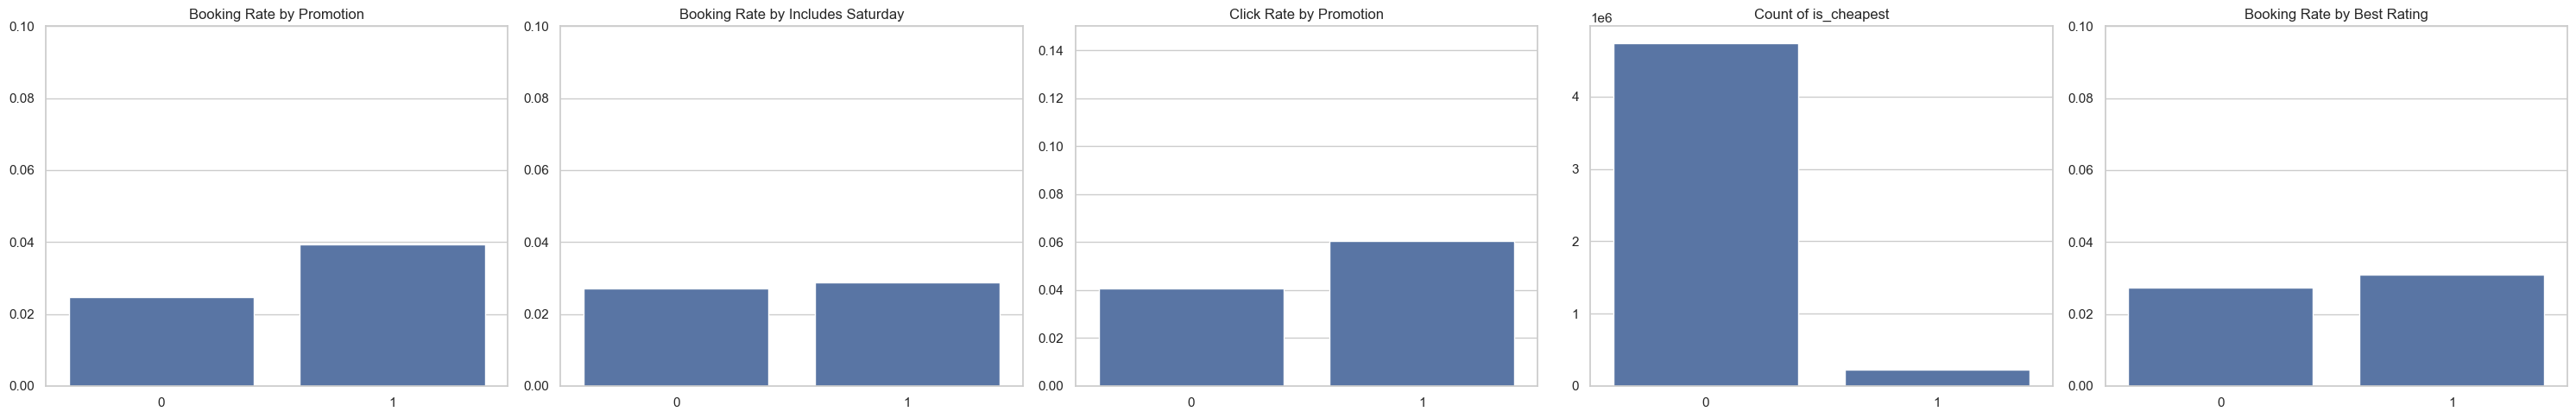

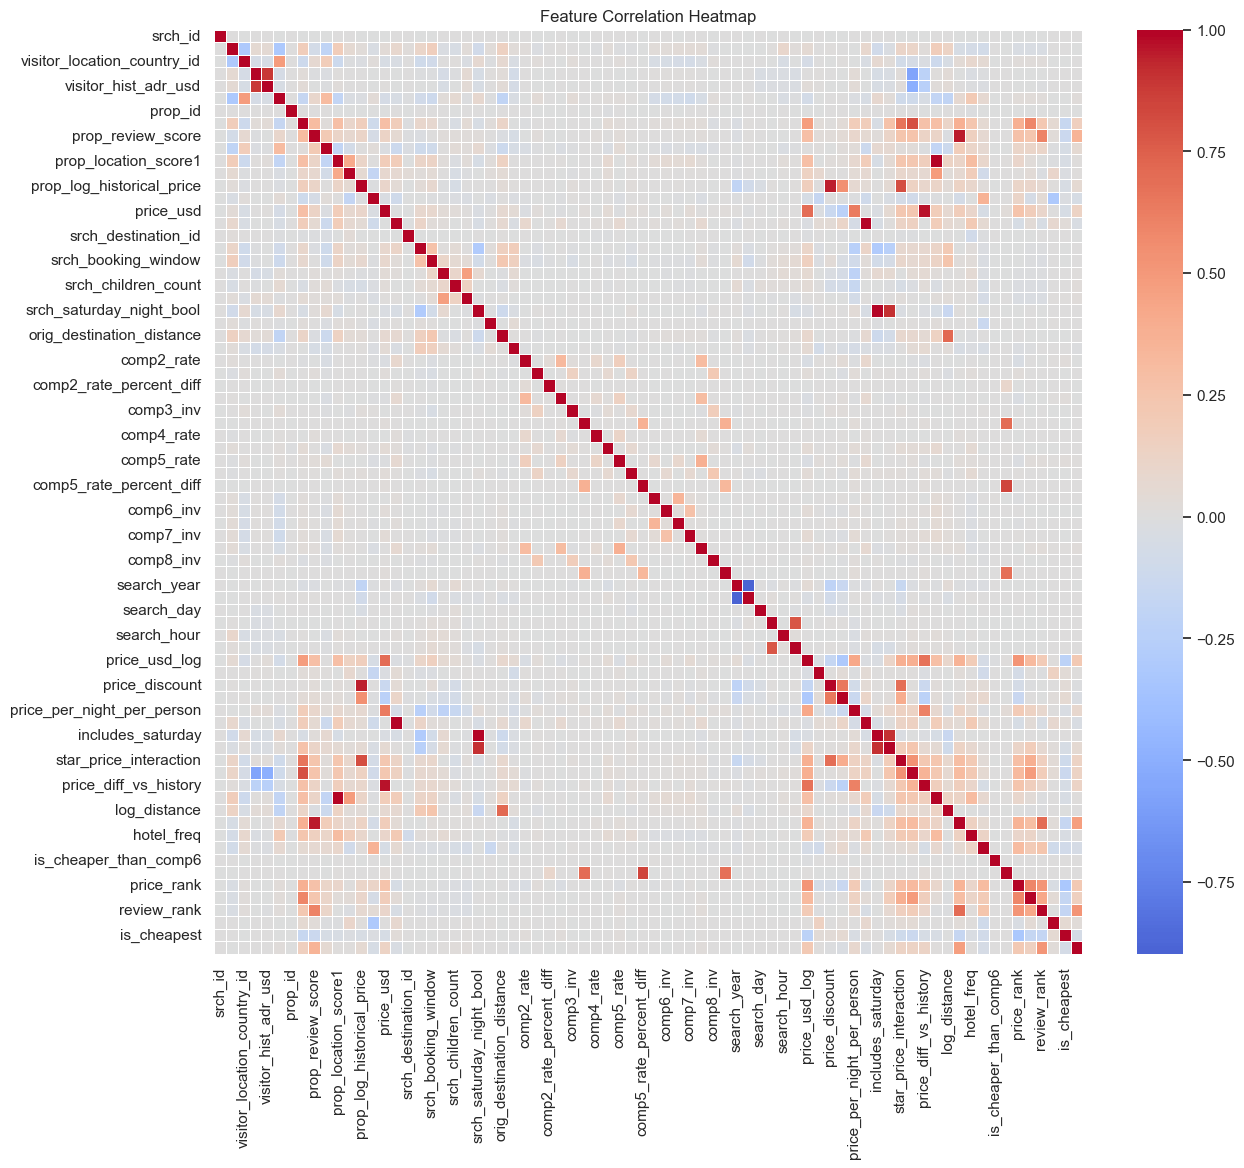

In [19]:
# Set general style
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (8, 5)

# Distribution Plots
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

sns.histplot(train['price_usd_log'], bins=50, kde=True, ax=axs[0])
axs[0].set_title('log(price_usd) Distribution')

sns.histplot(np.log1p(train['orig_destination_distance']), bins=50, kde=True, ax=axs[1])
axs[1].set_title('log(orig_destination_distance) Distribution')

for ax in axs:
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

# Boxplots
fig, axs = plt.subplots(3, 4, figsize=(28, 12))

# Row 1: Basic hotel and interest features
# log(price_usd)
sns.boxplot(x='booking_bool', y='price_usd_log', data=train, ax=axs[0, 0])
axs[0, 0].set_title('log(price_usd) vs Booking')

# location_score_sum
sns.boxplot(x='booking_bool', y='location_score_sum', data=train, ax=axs[0, 1])
axs[0, 1].set_title('Location Score vs Booking')

# review_score
sns.boxplot(x='booking_bool', y='prop_review_score', data=train, ax=axs[0, 2])
axs[0, 2].set_title('Review Score vs Booking')

# affinity_score
sns.boxplot(x='booking_bool', y='srch_query_affinity_score', data=train, ax=axs[0, 3])
axs[0, 3].set_title('Affinity Score vs Booking')

# Row 2: Pricing and ranking features
# Normalized price per person per night and its relation to booking
sns.boxplot(x='booking_bool', y='price_per_night_per_person', data=train, ax=axs[1, 0])
axs[1, 0].set_title('Price Per Person vs Booking')
axs[1, 0].set_ylim(0, 1000)

# Average price difference compared to competitors
sns.boxplot(x='booking_bool', y='avg_comp_discount', data=train, ax=axs[1, 1])
axs[1, 1].set_title('Avg Comp Discount vs Booking')
axs[1, 1].set_ylim(-100, 100)

# Does star rating rank (within search group) influence booking?
sns.boxplot(x='booking_bool', y='star_rank', data=train, ax=axs[1, 2])
axs[1, 2].set_title('Star Rank vs Booking')

# Is the lowest-priced hotel in the group booked more often?
sns.boxplot(x='booking_bool', y='price_rank', data=train, ax=axs[1, 3])
axs[1, 3].set_title('Price Rank vs Booking')

# Match with user history
# Does the hotel match the user's historical star rating preference?
sns.boxplot(x='booking_bool', y='starrating_diff', data=train, ax=axs[2, 0])
axs[2, 0].set_title('Star Rating Diff vs Booking')

# Price deviation from user's historical average payment
sns.boxplot(x='booking_bool', y='price_diff_vs_history', data=train, ax=axs[2, 1])
axs[2, 1].set_title('Price Diff vs History vs Booking')

# How frequently the hotel appears in the data (popularity)
sns.boxplot(x='booking_bool', y='hotel_freq', data=train, ax=axs[2, 2])
axs[2, 2].set_title('Hotel Frequency vs Booking')
axs[2, 2].set_ylim(0, 300)

# Empty placeholder
axs[2, 3].axis('off')

for row in axs:
    for ax in row:
        ax.set_xlabel('Booking')

plt.tight_layout()
plt.show()

# Barplots - 5 behavior-related features
fig, axs = plt.subplots(1, 5, figsize=(30, 5))

# 1. Booking Rate by Promotion
grouped1 = train.groupby('is_promotion')['booking_bool'].mean().reset_index()
sns.barplot(x='is_promotion', y='booking_bool', data=grouped1, ax=axs[0])
axs[0].set_title('Booking Rate by Promotion')
axs[0].set_ylim(0, 0.1)

# 2. Booking Rate by Includes Saturday
grouped2 = train.groupby('includes_saturday')['booking_bool'].mean().reset_index()
sns.barplot(x='includes_saturday', y='booking_bool', data=grouped2, ax=axs[1])
axs[1].set_title('Booking Rate by Includes Saturday')
axs[1].set_ylim(0, 0.1)

# 3. Click Rate by Promotion
grouped3 = train.groupby('is_promotion')['click_bool'].mean().reset_index()
sns.barplot(x='is_promotion', y='click_bool', data=grouped3, ax=axs[2])
axs[2].set_title('Click Rate by Promotion')
axs[2].set_ylim(0, 0.15)

# 4. Count of is_cheapest
sns.countplot(x='is_cheapest', data=train, ax=axs[3])
axs[3].set_title('Count of is_cheapest')

# 5. Booking Rate by Best Rating
grouped_best = train.groupby('is_best_rating')['booking_bool'].mean().reset_index()
sns.barplot(x='is_best_rating', y='booking_bool', data=grouped_best, ax=axs[4])
axs[4].set_title('Booking Rate by Best Rating')
axs[4].set_ylim(0, 0.1)

for ax in axs:
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

# Heatmap: numeric feature correlations
numeric_feats = train.select_dtypes(include='number').drop(columns=['click_bool', 'booking_bool'])
corr = numeric_feats.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [20]:
# Final check for missing values in the dataset
missing_counts = train.isnull().sum()
missing_percent = (missing_counts / len(train)) * 100

missing_summary = pd.DataFrame({
    'MissingCount': missing_counts,
    'MissingPercent': missing_percent
})

# Filter to show only columns with missing values
missing_summary = missing_summary[missing_summary['MissingCount'] > 0].sort_values(by='MissingPercent', ascending=False)

# Display result
if not missing_summary.empty:
    print("Missing values detected:")
    display(missing_summary)
else:
    print("No missing values. Data clean for modeling.")

No missing values. Data clean for modeling.
